Homework 1: LLMs Experiments -- Applications -- Task 4
----

See the `task01` notebook for instructions. Include *all* AI citations in the `task01` notebook.


Name: Kate Lanman


Task 4: Adding temperature to the `softmax` function (15 points)
----

We've set up the start of a temperature demonstration for you below, using the same example vocabulary from the Canvas quiz.

To finish this demo:
1. implement a `softmax` function (equation written below), calculate and display your starting probability distribution where: 

    - $e$ is the constant $e$ (`math.e`).
    - $z_i$ is the score for the $i$ th token.
    - $k$ is the size of your vocabulary. Therefore, $z_j$ goes through the scores of all tokens in your vocabulary.  
    (In other words, the denominator is the sum of $e$ raised to the power of each one of your $z$ values). 
    
$$ \texttt{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j = 1}^k e^{z_j}}$$


You should end up with a well-formed probability distribution.  
Remember, the goal of `softmax` is to convert a set of arbitary scores into a distribution that sums to 1.  
So, $\texttt{softmax}(z_i)$ returns the probability that the language model will select the $i$th token as the next word.


Use the example code below to help display a graph of your probabilities.

---

2. Add a temperature parameter ($\tau$) to your softmax function (equation below).  


Afterwards, you'll demonstrate the results of changing the temperature by creating more graphs or adding to the one you already have.  
Display the effects of lowering the **temperature below 1**, having the **temperature equal 1**, and having the **temperature above 1**.  
Your graph(s) must be *easily interpretable* and *accurate*.

$$ \texttt{softmax}(z_i, \tau) = \frac{e^{\frac{z_i}{\tau}}}{\sum_{j = 1}^k e^{\frac{z_j}{\tau}}}$$


In [1]:
import math
import matplotlib.pyplot as plt

vocab = ["the", "dog", "cat", "dragon", "ate", "slept", "ran", "to", "a", "banana"]
# remember that the scores are in the same order as the vocab, and are *not* a probability distribution
# Generally speaking, words with higher probabilities have a number closer to 1, words with lower probabilities have a number closer to -1.
scores = [0.7, 0.5, -0.5, -0.9, 0.1, 0.2, 0.5, 0.4, 0.4, -0.3]

# softmax without temperature
def softmax(z_i, scores):
    numerator = math.e ** z_i
    denominator = sum([math.e ** score for score in scores])

    return numerator / denominator

Sum of probabilities: 1.0


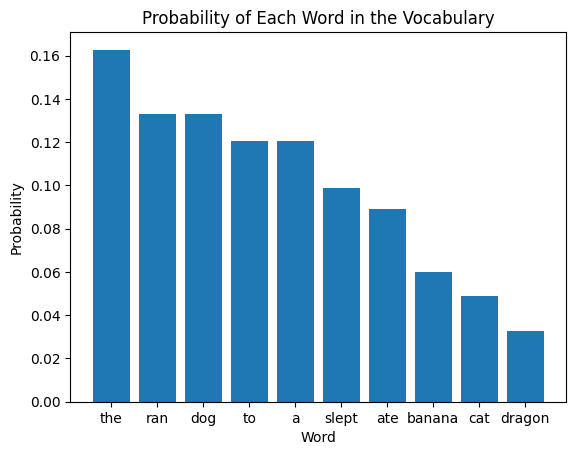

In [2]:
probs = [softmax(s, scores) for s in scores]
probs, vocab = zip(*sorted(list(zip(probs, vocab)), reverse=True)) # sort from greatest to least

# confirm probabilities sum to 1
print(f'Sum of probabilities: {sum(probs)}')

# plot
plt.bar(vocab, probs)

plt.xlabel('Word')
plt.ylabel('Probability')
plt.title('Probability of Each Word in the Vocabulary')

plt.savefig('figures/p_bar_chart.jpeg')
plt.show()

In [3]:
# softmax with temperature
def softmax(z_i, scores, temperature=1):
    numerator = math.e ** (z_i/temperature)
    denominator = sum([math.e ** (score/temperature) for score in scores])

    return numerator / denominator

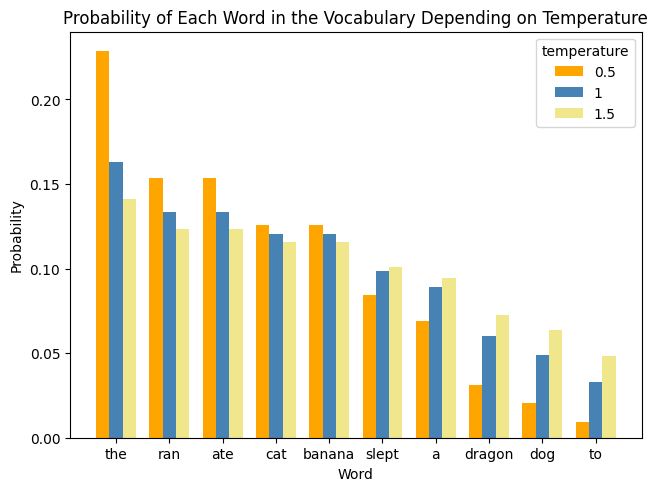

In [4]:
import numpy as np 

scores, vocab = zip(*sorted(list(zip(scores, vocab)), reverse=True)) # sort from greatest to least

# calculate probabilities
scores_by_temp = {}
for t in [0.5, 1, 1.5]:
    probs = [softmax(s, scores, t) for s in scores]
    scores_by_temp[str(t)] = probs

x = np.arange(len(scores)) 
width = 0.25 
multiplier = 0

# plot as grouped bar chart 
fig, ax = plt.subplots(layout='constrained')
colors = ['orange', 'steelblue', 'khaki']

for attribute, measurement in scores_by_temp.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[multiplier])
    multiplier += 1

ax.set_xticks(x + width, vocab)

plt.xlabel("Word")
plt.ylabel("Probability")
plt.title('Probability of Each Word in the Vocabulary Depending on Temperature')
plt.legend(title="temperature")

plt.savefig('figures/p_grouped_bar_chart.jpeg')
plt.show()

The below function is provided as a tiny Matplotlib tutorial.  
You can use it as a base for your graphs, or ignore it and make your own plotting function.  
The [Matplotlib website](https://matplotlib.org/stable/gallery/index.html) has lots of documentation and examples.
Note that there are many different ways to make this graph!

Your graph doesn't need to be beautiful, but it does need to make sense.  
Make sure that it is sufficiently labeled, so the viewer can understand it.  
Does your graph convey what you have learned about temperature? What kind of graph suits your needs the best?

In [5]:
# you can change the function signature to take in any parameters you'd like
# but update the documentation if you do
# delete whatever code you don't want to keep
def simple_barplot(labels: list, heights: list[float], savefile: str) -> None:
    """
    PROVIDED
    Renders a bar plot.
    
    Parameters:
        labels: The labels/locations for each bar. Can be strings or floats.
        heights: The height of each bar.
        savefile: The name of the file to save the plot to.
    """
    # Create the workspace.
    # `fig` is the entire figure to be rendered.
    # `ax` is the current Axes, i.e. the specific graph we're working on.
    
    # we get more control over the graph by using plt.subplots(),
    # but for simple plots, we can just use plt instead and not worry about fig and ax.
    # you would replace `ax` with `plt` in the rest of the function and not
    # include the call to plt.subplots()
    # up to you which you prefer!
    fig, ax = plt.subplots()
    
    # Plot the bars.
    # Note that the first parameter can either be a list of labels,
    # or a list of the positions of the bars.
    # The latter is useful for more fine-grained adjustments.
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html
    ax.bar(labels, heights, label="EXAMPLE LABEL")
    
    # if you want to add another series (not required for this assignment)
    # ax.bar(labels2, heights2, label="EXAMPLE LABEL 2")
    
    # Add more information to the graph.
    ax.set_xlabel('FILL ME IN')
    ax.set_ylabel('FILL ME IN')
    ax.set_title('FILL ME IN')
    
    # make sure the legend shows up
    ax.legend()

    # save the graph to a file
    plt.savefig('temp_graph.jpeg')

    # "Freeze" the graph and render it.
    plt.show()

Challenge problem!
----

__This problem will *only* be graded for feedback. It is assigned *no* points__

Create a demonstration of changing the `top-k` parameter, using the same vocabulary and probability distributions that you defined in the previous question.

1. To complete this task, you will need to write a function that actually samples from your vocabulary (we'll only be sampling for the next word for this exercise) and that takes a parameter to represent `top-k`.

2. `top-k` defines the number of words we will consider from the vocabulary when choosing the next word (take the *k* most likely), then re-normalizes the distribution to only consider these  `top-k` words.

3. Demonstrate the effects of `top-k` using your sampling function with different values for `top-k`, showing both the `top-k` sampled distribution and the next word that is ultimately chosen.

In [6]:
# Any code that you need to write for the top-k demonstrations should go here
# add as many cells as you'd like to

STOP!!!
=====

Before turning any homework notebook in:

- When you have finished each notebook, __clear the kernel__ and __run__ your notebook "fresh" from top to bottom. Ensure that there are __no errors__. 
    - If a problem asks for you to write code that does result in an error (as in, the answer to the problem is an error), leave the code in your notebook but commented out so that running from top to bottom does not result in any errors.
- Double check that you have completed Task 0 __after__ you finish the rest of the assignment
- Submit your work on Gradescope.